In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the data
loan_data = pd.read_csv("loan.csv")

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_data.shape

(39717, 111)

In [5]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## It is Noticed that there are a lot of columns with only Null values, we will remove them first

In [6]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## There are also some coulmns with only a single value for all ids which will not contribute for better analysis, hence removing them 

In [7]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


## There are few more columns we can remove that have unique responses throughout the data

In [8]:
loan_data.drop(["id","url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt",  "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [9]:
loan_data.shape

(39717, 24)

In [10]:
loan_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

### Now we are left with 24 columns

## Our aim is to analyse the give data understand to understand why does an individual default



    We cannot use the loans currently active to analzye the data for defaulters, so we will exclude the data of active loans from the data set

In [11]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Now checking for missing values

In [12]:
((loan_data.isna().sum()/len(loan_data.index))*100).sort_values(
    ascending=False)

emp_length              2.677761
pub_rec_bankruptcies    1.806776
revol_util              0.129611
loan_status             0.000000
total_acc               0.000000
pub_rec                 0.000000
open_acc                0.000000
inq_last_6mths          0.000000
earliest_cr_line        0.000000
delinq_2yrs             0.000000
dti                     0.000000
purpose                 0.000000
member_id               0.000000
loan_amnt               0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
funded_amnt_inv         0.000000
issue_d                 0.000000
dtype: float64

## Handling Missing values
 - columns with missing values are "emp_length", "pub_rec_bankruptcies", and  "revol_util". 
 - So before doing that, lets see what kind of data each column has. 

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   member_id             38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  dti                

In [14]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### The above counts shows that the mode value has far higher frequency than that of the next most frequent value. 
- This means that we can safely assign the value of mode to the null values in the column.
- Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [15]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [16]:
#now converting emp_length to have only numbers
loan_data.emp_length.fillna('0',inplace=True)
loan_data['emp_length']=loan_data.emp_length.str.extract('(\d+)')
loan_data.head(2)

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,1296599,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,...,credit_card,27.65,0,Jan-85,1,3,0,83.70%,9,0.0
1,1314167,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,...,car,1.00,0,Apr-99,5,3,0,9.40%,4,0.0


In [17]:
# pub_rec_bankruptcies can be cleaned for further analysis.
loan_data.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan_data.pub_rec_bankruptcies.isnull().sum())

0


In [18]:
# Lets remove % symbol from "int_rate" and "revol_util" column so that it can be used in calculations
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%')
loan_data['int_rate'] = loan_data['int_rate'].astype(np.float)
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%')
loan_data['revol_util']  = loan_data['revol_util'].astype(np.float)

In [19]:
loan_data.head()

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,1296599,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,credit_card,27.65,0,Jan-85,1,3,0,83.7,9,0.0
1,1314167,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,car,1.00,0,Apr-99,5,3,0,9.4,4,0.0
2,1313524,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,small_business,8.72,0,Nov-01,2,2,0,98.5,10,0.0
3,1277178,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,other,20.00,0,Feb-96,1,10,0,21.0,37,0.0
5,1311441,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,wedding,11.20,0,Nov-04,3,9,0,28.3,12,0.0


### Outlier Data Treatment

[]

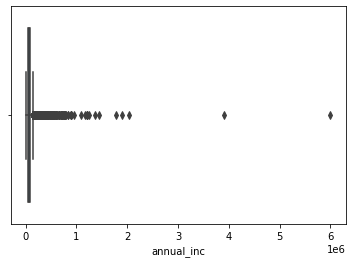

In [20]:
sns.boxplot(loan_data['annual_inc'])
plt.plot()

In [21]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

[]

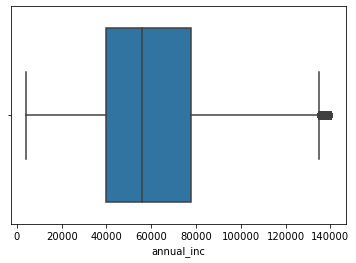

In [22]:
sns.boxplot(loan_data['annual_inc'])
plt.plot()

Now the "annual_inc" data looks good and proceeding next. Let's look at some other numerical variables which could possibly have  outliers like
  -  dti
  -  loan_amnt
  -  funded_amnt_inv

[]

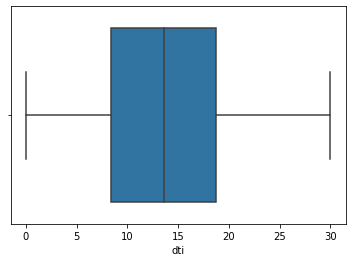

In [23]:
sns.boxplot(loan_data.dti).plot()

In [24]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

[]

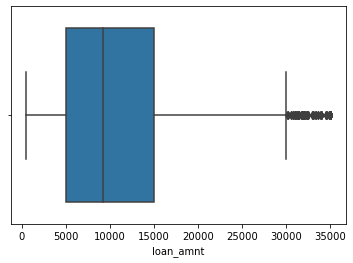

In [25]:
sns.boxplot(loan_data.loan_amnt).plot()

<AxesSubplot:xlabel='funded_amnt_inv'>

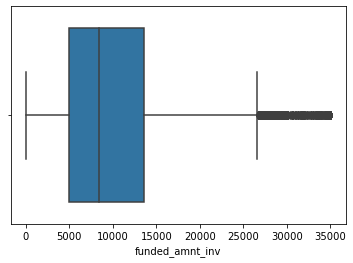

In [26]:
sns.boxplot(loan_data.funded_amnt_inv)

#### Though there are some outliers for these columns we are not considering them as outliers as there is a small difference between the Fence and the outliers

## Univariate Analysis

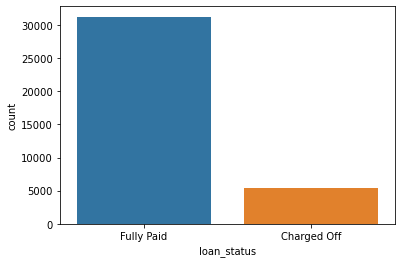

In [27]:
sns.countplot(x = 'loan_status', data = loan_data)
plt.show()

**Inference:** 
1. Most of the loans are Fully Paid. 
2. About 5000 (14%) loans are having status as defaulters.
3. We have a imbalance here in the defaulters and teh fully paid

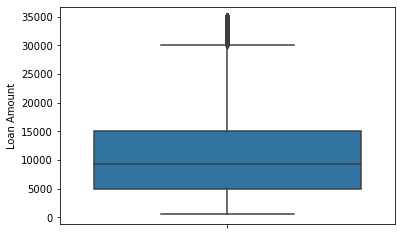

In [28]:
sns.boxplot(y=loan_data["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

##### **Inference:** The loan amount varies from 0 to 35,000 having mean of 10,000

In [29]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

[]

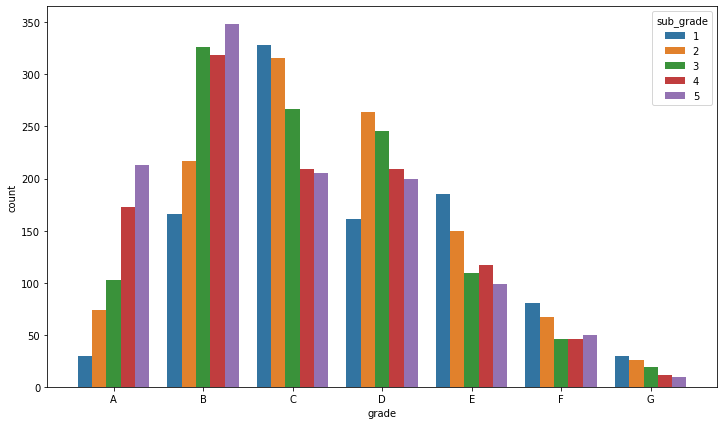

In [30]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off']).plot()

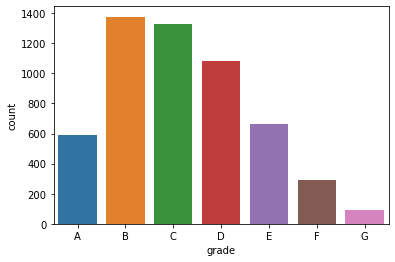

In [31]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

##### **Inference:** Most of the loans are of grade B and C with  grade 'B5' being the most number of loans being charged off (defaulters)

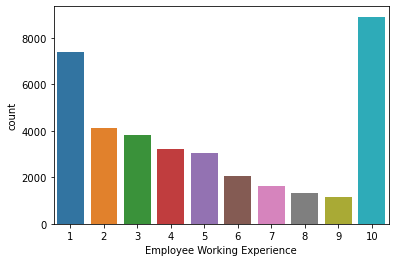

In [32]:
sns.countplot(x='emp_length', data=loan_data, order = ['1','2','3','4','5','6','7','8','9','10'])
plt.xlabel('Employee Working Experience')
plt.show()

##### **Inference:** Most of the loans taken by employees who have either 1 year experience or 10 years experience

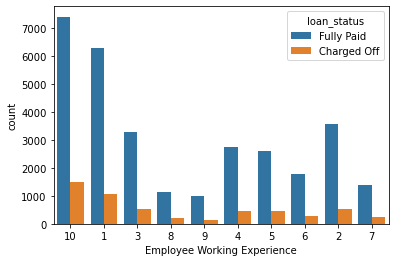

In [33]:
sns.color_palette()
sns.countplot(x='emp_length', hue='loan_status', data=loan_data)
plt.xlabel('Employee Working Experience')
plt.show()

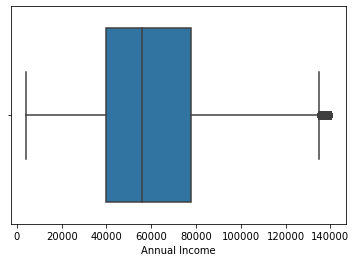

In [34]:
sns.boxplot(x=loan_data['annual_inc'])
plt.xlabel('Annual Income')
plt.show()

**Inference:** Most of the income of the applicants is between 40 thousand and 80 thousand

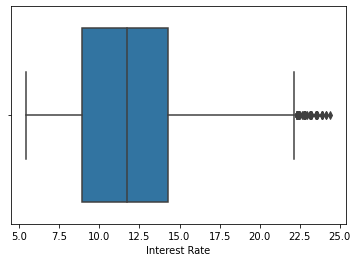

In [35]:
sns.boxplot(x=loan_data['int_rate'])
plt.xlabel('Interest Rate')
plt.show()

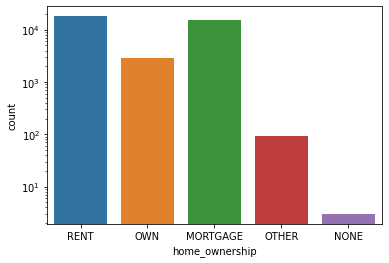

In [36]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data)
plt.show()

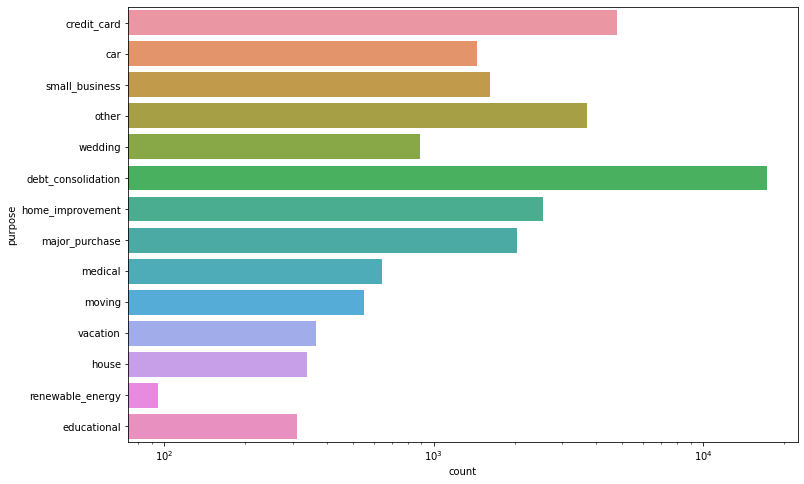

In [37]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data)
plt.show()


#### Creating bins for some variables to analyze them better 

In [38]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_data['loan_inc_ratio'] = loan_data.funded_amnt_inv*100/loan_data.annual_inc

In [39]:
# Viewing new bins created
loan_data.head()

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,loan_inc_ratio
0,1296599,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,...,0,83.7,9,0.0,9%-13%,2-10,80-100,2-20,3k-31k,20.729167
1,1314167,2500,2500.0,60 months,15.27,59.83,C,4,1,RENT,...,0,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k,8.333333
2,1313524,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,...,0,98.5,10,0.0,13%-17%,2-10,80-100,2-20,3k-31k,19.588639
3,1277178,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,...,0,21.0,37,0.0,13%-17%,2-10,20-40,20-37,31k-58k,20.325203
5,1311441,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,...,0,28.3,12,0.0,5%-9%,2-10,20-40,2-20,31k-58k,13.888889


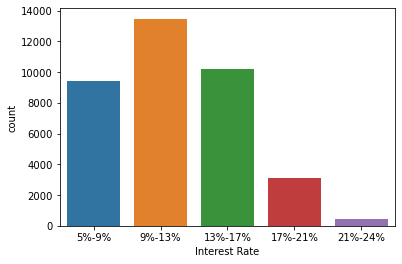

In [40]:
sns.countplot(x='int_rate_groups', data=loan_data)
plt.xlabel('Interest Rate')
plt.show()

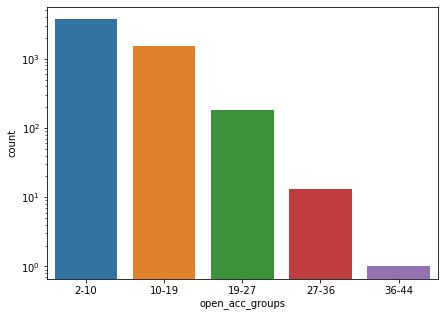

In [41]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.show()

## Segmented Univariate Analysis

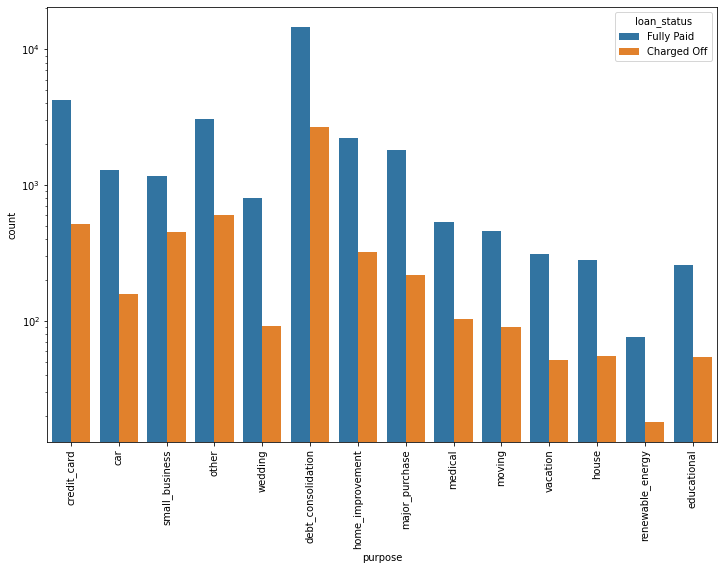

In [42]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(yscale = 'log')
sns.countplot(x='purpose', hue="loan_status", data=loan_data)
plt.xticks(rotation=90)
plt.show()

**Inference:** Majority of loan has been given for the debt consolidation purpose and has been fully paid.

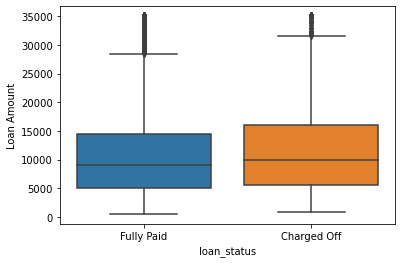

In [43]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=loan_data)
plt.ylabel('Loan Amount')
plt.show()

#### Inference: Mean, 25% and 75% Loan amount of Fully paid and charged off is almost the same

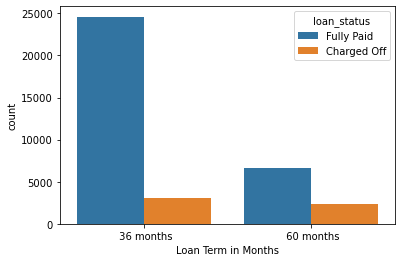

In [44]:
sns.countplot( x="term", hue='loan_status', data=loan_data)
plt.xlabel('Loan Term in Months')
plt.show()

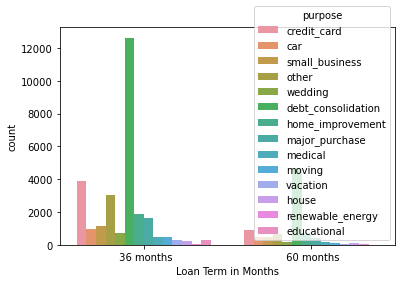

In [45]:
sns.countplot( x="term", hue='purpose', data=loan_data)
plt.xlabel('Loan Term in Months')
plt.show()

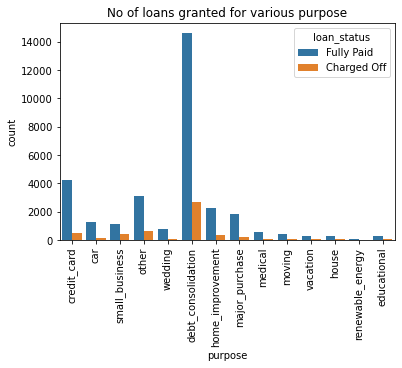

In [46]:
sns.countplot(x='purpose', hue='loan_status', data=loan_data)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

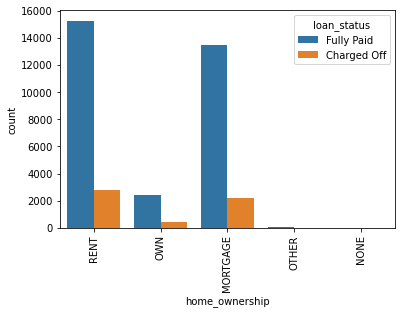

In [47]:
sns.countplot(x='home_ownership',hue='loan_status', data=loan_data)
plt.xticks(rotation=90)
plt.show()

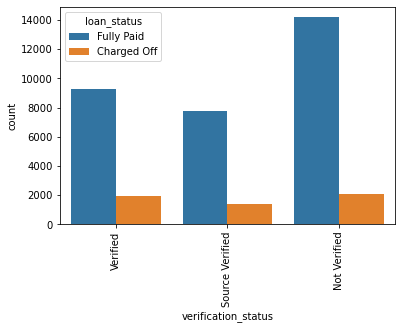

In [48]:
sns.countplot(x='verification_status',hue='loan_status', data=loan_data)
plt.xticks(rotation=90)
plt.show()

## Bivariate Plots

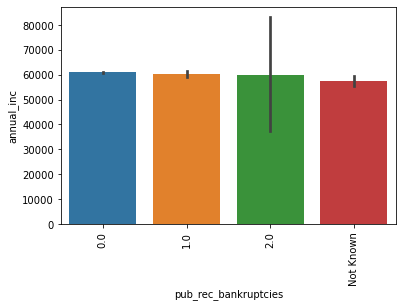

In [49]:
sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=loan_data)
plt.xticks(rotation=90)
plt.show()

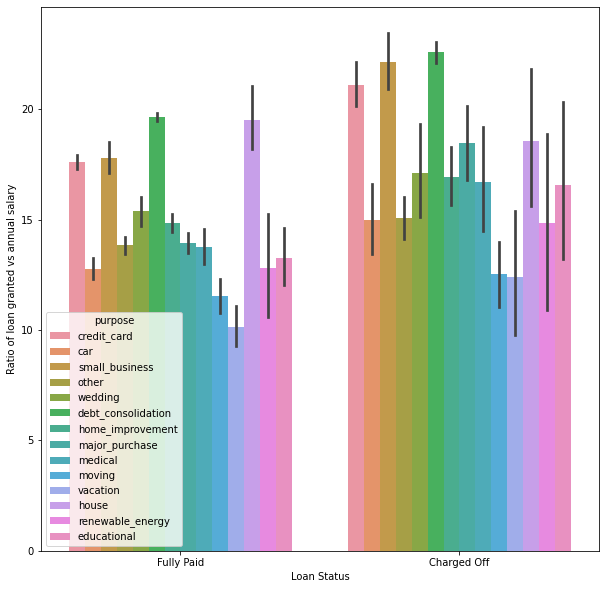

In [50]:
plt.figure(figsize=(10,10))
sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=loan_data)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

# Observations Summary

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the number of derogatory public records is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a sub grade of 'B5' level.
